[View in Colaboratory](https://colab.research.google.com/github/silentvoice/dl-with-keras/blob/master/regularization.ipynb)

# Regularisation


## Check Tensorflow Version

In [0]:
import tensorflow as tf

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
tf.__version__

'1.9.0-rc2'

## Imports

In [0]:
from tensorflow import keras
from tensorflow.python.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import layers, models, regularizers

## Load Imdb dataset

In [0]:
# Use top 10000 frequently used words from the dataset only, discard the rest
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
train_data.shape

(25000,)

In [8]:
train_labels.shape

(25000,)

In [0]:
wrdtoidx = imdb.get_word_index()

In [0]:
idxtowrd = dict([(value, key) for (key, value) in wrdtoidx.items()])

In [0]:
sample_review = ' '.join([idxtowrd.get(idx) for idx in train_data[0]])

In [13]:
sample_review

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

## Data Preparation

In [0]:
def one_hot_encode(samples, no_features):
  output_tensor = np.zeros((len(samples), no_features))
  for idx, sample in enumerate(samples):
    output_tensor[idx, sample] = 1
  return output_tensor

In [0]:
x_train = one_hot_encode(train_data, 10000)
x_test = one_hot_encode(test_data, 10000)

In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Compare models with different number of hidden units

In [0]:
org_model = models.Sequential()
org_model.add(layers.Dense(16, activation= 'relu',input_shape = (10000,)))
org_model.add(layers.Dense(16, activation= 'relu'))
org_model.add(layers.Dense(1, activation= 'sigmoid'))
org_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [0]:
small_model = models.Sequential()
small_model.add(layers.Dense(4, activation= 'relu',input_shape = (10000,)))
small_model.add(layers.Dense(4, activation= 'relu'))
small_model.add(layers.Dense(1, activation= 'sigmoid'))
small_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [0]:
big_model = models.Sequential()
big_model.add(layers.Dense(512, activation= 'relu',input_shape = (10000,)))
big_model.add(layers.Dense(512, activation= 'relu'))
big_model.add(layers.Dense(1, activation= 'sigmoid'))
big_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [21]:
org_model_history = org_model.fit(x_train, 
                              y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_test, y_test)
                             )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 111us/step - loss: 0.4502 - acc: 0.8193 - val_loss: 0.3628 - val_acc: 0.8577
Epoch 2/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.2544 - acc: 0.9114 - val_loss: 0.3036 - val_acc: 0.8778
Epoch 3/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1982 - acc: 0.9296 - val_loss: 0.2861 - val_acc: 0.8860
Epoch 4/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.1652 - acc: 0.9411 - val_loss: 0.3303 - val_acc: 0.8701
Epoch 5/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.1420 - acc: 0.9505 - val_loss: 0.3341 - val_acc: 0.8727
Epoch 6/20
25000/25000 [==============================] - 2s 91us/step - loss: 0.1244 - acc: 0.9567 - val_loss: 0.3584 - val_acc: 0.8688
Epoch 7/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.1076 - acc: 0.9639 - val_loss: 0.3642 - val_ac

In [25]:
small_model_history = small_model.fit(x_train, 
                              y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_test, y_test)
                             )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.0718 - acc: 0.9794 - val_loss: 0.4386 - val_acc: 0.8665
Epoch 2/20
25000/25000 [==============================] - 2s 93us/step - loss: 0.0676 - acc: 0.9812 - val_loss: 0.4531 - val_acc: 0.8657
Epoch 3/20
25000/25000 [==============================] - 2s 93us/step - loss: 0.0638 - acc: 0.9829 - val_loss: 0.4704 - val_acc: 0.8635
Epoch 4/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.0603 - acc: 0.9839 - val_loss: 0.4876 - val_acc: 0.8624
Epoch 5/20
25000/25000 [==============================] - 2s 92us/step - loss: 0.0566 - acc: 0.9854 - val_loss: 0.5057 - val_acc: 0.8606
Epoch 6/20
25000/25000 [==============================] - 2s 93us/step - loss: 0.0532 - acc: 0.9861 - val_loss: 0.5257 - val_acc: 0.8592
Epoch 7/20
25000/25000 [==============================] - 2s 93us/step - loss: 0.0503 - acc: 0.9875 - val_loss: 0.5422 - val_acc

In [26]:
big_model_history = big_model.fit(x_train, 
                              y_train,
                              epochs=20,
                              batch_size=512,
                              validation_data=(x_test, y_test)
                             )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 4s 146us/step - loss: 0.4597 - acc: 0.7931 - val_loss: 0.2829 - val_acc: 0.8890
Epoch 2/20
25000/25000 [==============================] - 3s 129us/step - loss: 0.2180 - acc: 0.9130 - val_loss: 0.2994 - val_acc: 0.8796
Epoch 3/20
25000/25000 [==============================] - 3s 128us/step - loss: 0.1268 - acc: 0.9515 - val_loss: 0.4180 - val_acc: 0.8679
Epoch 4/20
25000/25000 [==============================] - 3s 123us/step - loss: 0.0710 - acc: 0.9778 - val_loss: 0.3616 - val_acc: 0.8819
Epoch 5/20
25000/25000 [==============================] - 3s 122us/step - loss: 0.0407 - acc: 0.9897 - val_loss: 0.4988 - val_acc: 0.8812
Epoch 6/20
25000/25000 [==============================] - 3s 120us/step - loss: 0.0023 - acc: 0.9997 - val_loss: 0.6753 - val_acc: 0.8806
Epoch 7/20
25000/25000 [==============================] - 3s 124us/step - loss: 0.0736 - acc: 0.9902 - val_loss: 0.6395 - 

## Plot the training and validation losses of the models

In [0]:

org_model_val_loss = org_model_history.history['val_loss']
small_model_val_loss = small_model_history.history['val_loss']
big_model_val_loss = big_model_history.history['val_loss']

In [0]:
org_model_train_loss = org_model_history.history['loss']
small_model_train_loss = small_model_history.history['loss']
big_model_train_loss = big_model_history.history['loss']

In [0]:
epochs = range(1, 20 + 1)

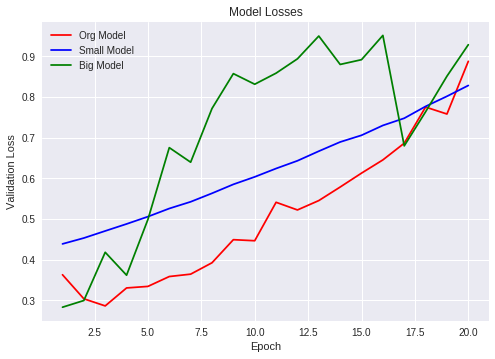

In [50]:
plt.plot(epochs, org_model_val_loss, 'r', label='Org Model')
plt.plot(epochs, small_model_val_loss, 'b', label='Small Model')
plt.plot(epochs, big_model_val_loss, 'g', label='Big Model')
plt.title('Model Losses')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()

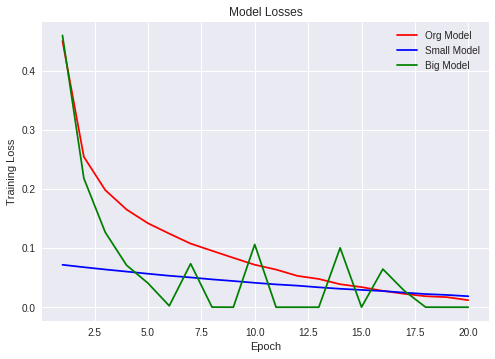

In [49]:
plt.plot(epochs, org_model_train_loss, 'r', label='Org Model')
plt.plot(epochs, small_model_train_loss, 'b', label='Small Model')
plt.plot(epochs, big_model_train_loss, 'g', label='Big Model')
plt.title('Model Losses')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

## Regularize the model

### L2 Regularization

In [42]:
l2_regul_model = models.Sequential()
l2_regul_model.add(layers.Dense(16, activation= 'relu',input_shape = (10000,),
                          kernel_regularizer=regularizers.l2(l=0.001)))
l2_regul_model.add(layers.Dense(16, activation= 'relu',
                         kernel_regularizer=regularizers.l2(l=0.001)))
l2_regul_model.add(layers.Dense(1, activation= 'sigmoid'))
l2_regul_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', 
              metrics=['accuracy'])
l2_regul_model_history = l2_regul_model.fit(x_train, 
                                            y_train,
                                            epochs=20,
                                            batch_size=512,
                                            validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 108us/step - loss: 0.4906 - acc: 0.8224 - val_loss: 0.3861 - val_acc: 0.8758
Epoch 2/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.3145 - acc: 0.9068 - val_loss: 0.3435 - val_acc: 0.8820
Epoch 3/20
25000/25000 [==============================] - 2s 97us/step - loss: 0.2709 - acc: 0.9182 - val_loss: 0.3396 - val_acc: 0.8822
Epoch 4/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.2478 - acc: 0.9283 - val_loss: 0.3384 - val_acc: 0.8855
Epoch 5/20
25000/25000 [==============================] - 2s 98us/step - loss: 0.2326 - acc: 0.9352 - val_loss: 0.3658 - val_acc: 0.8728
Epoch 6/20
25000/25000 [==============================] - 3s 101us/step - loss: 0.2253 - acc: 0.9390 - val_loss: 0.3796 - val_acc: 0.8718
Epoch 7/20
25000/25000 [==============================] - 2s 99us/step - loss: 0.2185 - acc: 0.9393 - val_loss: 0.3594 - val_a

### Dropout Method

In [45]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation= 'relu',input_shape = (10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation= 'relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation= 'sigmoid'))
dpt_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', 
              metrics=['accuracy'])
dpt_model_history = dpt_model.fit(x_train, 
                                y_train,
                                epochs=20,
                                batch_size=512,
                                validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 118us/step - loss: 0.5773 - acc: 0.6986 - val_loss: 0.4252 - val_acc: 0.8615
Epoch 2/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.4224 - acc: 0.8250 - val_loss: 0.3356 - val_acc: 0.8717
Epoch 3/20
25000/25000 [==============================] - 2s 93us/step - loss: 0.3404 - acc: 0.8712 - val_loss: 0.2854 - val_acc: 0.8886
Epoch 4/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.2899 - acc: 0.8941 - val_loss: 0.2745 - val_acc: 0.8903
Epoch 5/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.2549 - acc: 0.9093 - val_loss: 0.2784 - val_acc: 0.8895
Epoch 6/20
25000/25000 [==============================] - 2s 94us/step - loss: 0.2281 - acc: 0.9187 - val_loss: 0.2965 - val_acc: 0.8847
Epoch 7/20
25000/25000 [==============================] - 2s 95us/step - loss: 0.2060 - acc: 0.9267 - val_loss: 0.3038 - val_ac

## Comparing the Validation Loss for regularized models

In [0]:
l2_regul_model_val_loss = l2_regul_model_history.history['val_loss']
dpt_model_val_loss = dpt_model_history.history['val_loss']

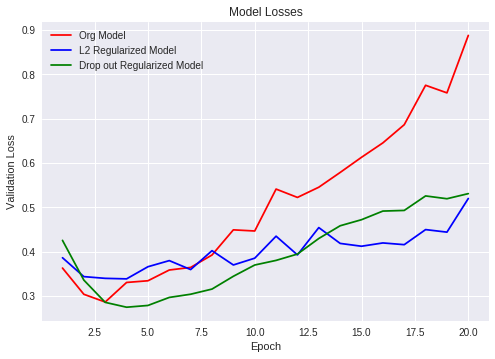

In [48]:
epochs = range(1, 20 + 1)
plt.plot(epochs, org_model_val_loss, 'r', label='Org Model')
plt.plot(epochs, l2_regul_model_val_loss, 'b', label='L2 Regularized Model')
plt.plot(epochs, dpt_model_val_loss, 'g', label='Drop out Regularized Model')
plt.title('Model Losses')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()